<a href="https://colab.research.google.com/github/rubel-47/HotelReview-Machine-Learning-Approach/blob/main/Hotel_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1]:
from google.colab import files
upload = files.upload()

Saving hotelreview.csv to hotelreview.csv


In [7]:
import io
df = pd.read_csv(io.BytesIO(upload['hotelreview.csv']))

In [8]:
df.shape

(38932, 5)

In [9]:
df[:5]

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


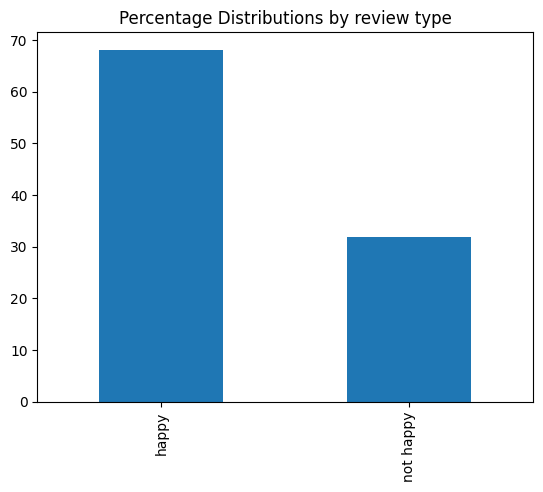

In [12]:
print('Percentage for default\n')
print(round(df.Is_Response.value_counts(normalize=True)*100,2))
round(df.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [16]:
#Removing colums
df.drop(columns=['User_ID','Browser_Used','Device_Used'],inplace=True)

In [17]:
df.head

<bound method NDFrame.head of                                              Description Is_Response
0      The room was kind of clean but had a VERY stro...   not happy
1      I stayed at the Crown Plaza April -- - April -...   not happy
2      I booked this hotel through Hotwire at the low...   not happy
3      Stayed here with husband and sons on the way t...       happy
4      My girlfriends and I stayed here to celebrate ...   not happy
...                                                  ...         ...
38927  We arrived late at night and walked in to a ch...       happy
38928  The only positive impression is location and p...   not happy
38929  Traveling with friends for shopping and a show...   not happy
38930  The experience was just ok. We paid extra for ...   not happy
38931  The Westin is a wonderfully restored grande da...       happy

[38932 rows x 2 columns]>

In [22]:
import re
import string

#This function converts to lower-case,removes square brackets , remove numbers and punctution
def text_clean(text):
  text = text.lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text = re.sub('\w\*\d\w*','',text)
  return text
cleaned_text = lambda x:text_clean(x)


In [23]:
#updated text
df['cleaned_desc'] = pd.DataFrame(df.Description.apply(cleaned_text))

In [25]:
df.head(5)

,Description,Is_Response,cleaned_desc
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


In [26]:
# Another cleaning
def text_clean(text):
   text = re.sub('[‘’“”…]', '', text)
   text = re.sub('\n', '', text)
   return text
cleaned_text = lambda x:text_clean(x)

In [27]:
# again check the updated text
df['cleaned_desc_new'] = pd.DataFrame(df['cleaned_desc'].apply(cleaned_text))

In [28]:
df.head(5)

,Description,Is_Response,cleaned_desc,cleaned_desc_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(df.cleaned_desc_new,df.Is_Response)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [36]:
model = Pipeline(
    [
        ('vectorizer',TfidfVectorizer()),
        ('classifier',LogisticRegression())
    ]
)

In [37]:
model.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [39]:
y_pred = model.predict(X_test)

In [40]:
confusion_matrix(y_pred,y_test)

array([[6228,  733],
       [ 411, 2361]])

In [44]:
# perfomance matrics to see the model performance
print("Accuracy : ",accuracy_score(y_pred,y_test))
print("Precision : ",precision_score(y_pred,y_test,average = 'weighted'))
print("Recall :  ",recall_score(y_pred,y_test,average='weighted'))

Accuracy :  0.8824617281413747
Precision :  0.8882514170003634
Recall :   0.8824617281413747


In [45]:
example = ['I am not happy']
result = model.predict(example)
print(result)

['not happy']
